## Some basic understanding before starting the problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### scikit-learn - ML in Python
* simple and efficint tools for data mining and data analysis
* accessible to everbody, and reusable in various contexts.
* Built on Numpy, Scipy and mtplotlb
* Open source , commercially usable- BSD license
 #### scikit-learn is an open-source Python library that implements a range of machine learning, pre-processing, cross-validation, and visualization algorithms using a unified interface.

## Dataframe
A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. DataFrames are one of the most common data structures used in modern data analytics because they are a flexible and intuitive way of storing and working with data.

In [2]:
price_data = {'Area': [2600,3000,3200,3600,4000],
             'Price': [550000,565000,610000,680000,725000]}
df= pd.DataFrame(price_data)
df

Area   Price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

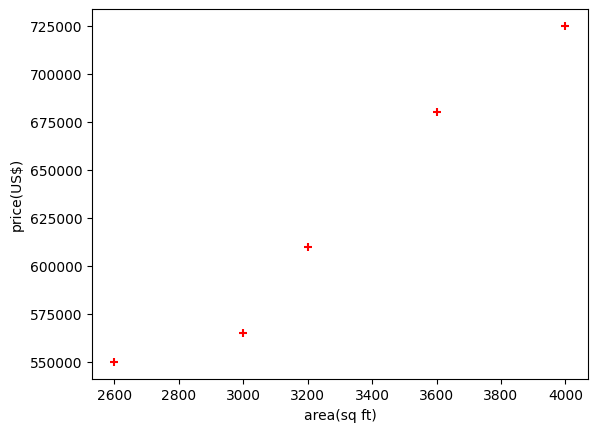

In [3]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price(US$)')
plt.scatter(df.Area, df.Price, color='red', marker='+')
plt.show()

In [4]:
X = df['Area']

In [5]:
X_array = X.values.reshape(-1,1)

In [6]:
y = df['Price']

In [7]:
reg = linear_model.LinearRegression() # created a object for linear regression

# fitting the data - which is training the linear regression model using the available data points
reg.fit(X_array,y) # x-axis- area, y - price 

LinearRegression()

In [8]:
reg

LinearRegression()

In [9]:
reg.predict(X_array)

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [10]:
new_x=3200
x_reshape= np.array(new_x).reshape(-1,1)

In [11]:
reg.predict(x_reshape)

array([615136.98630137])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

In [14]:
# y=m*x+b
(135.78767123*3200)+180616.43835616432

615136.9862921643

# QUESTION: 
ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements.

### Approach to a ML Problem
##### (1) Explore the data and find correlations between inputs and targets
##### (2) pick the right model, loss functions and optimizer for the problem at hand
##### (3) scale numeric variables and one hot encode categorical data
##### (4) set aside a test set(using a fraction of the training set)
##### (5) Train the model
##### (6) Make Predictions on the test and compute the loss 

# Solution:

### Regression Problem
Problems where a continuous numeric value must be predicted for each input are known as regression problems.

## This is a Regression Problem

### Linear regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).

* y = mx+b
* dependent variable = m * area(i.e. independent variable) + b
#### visual summary of how a linear regression model is structured:

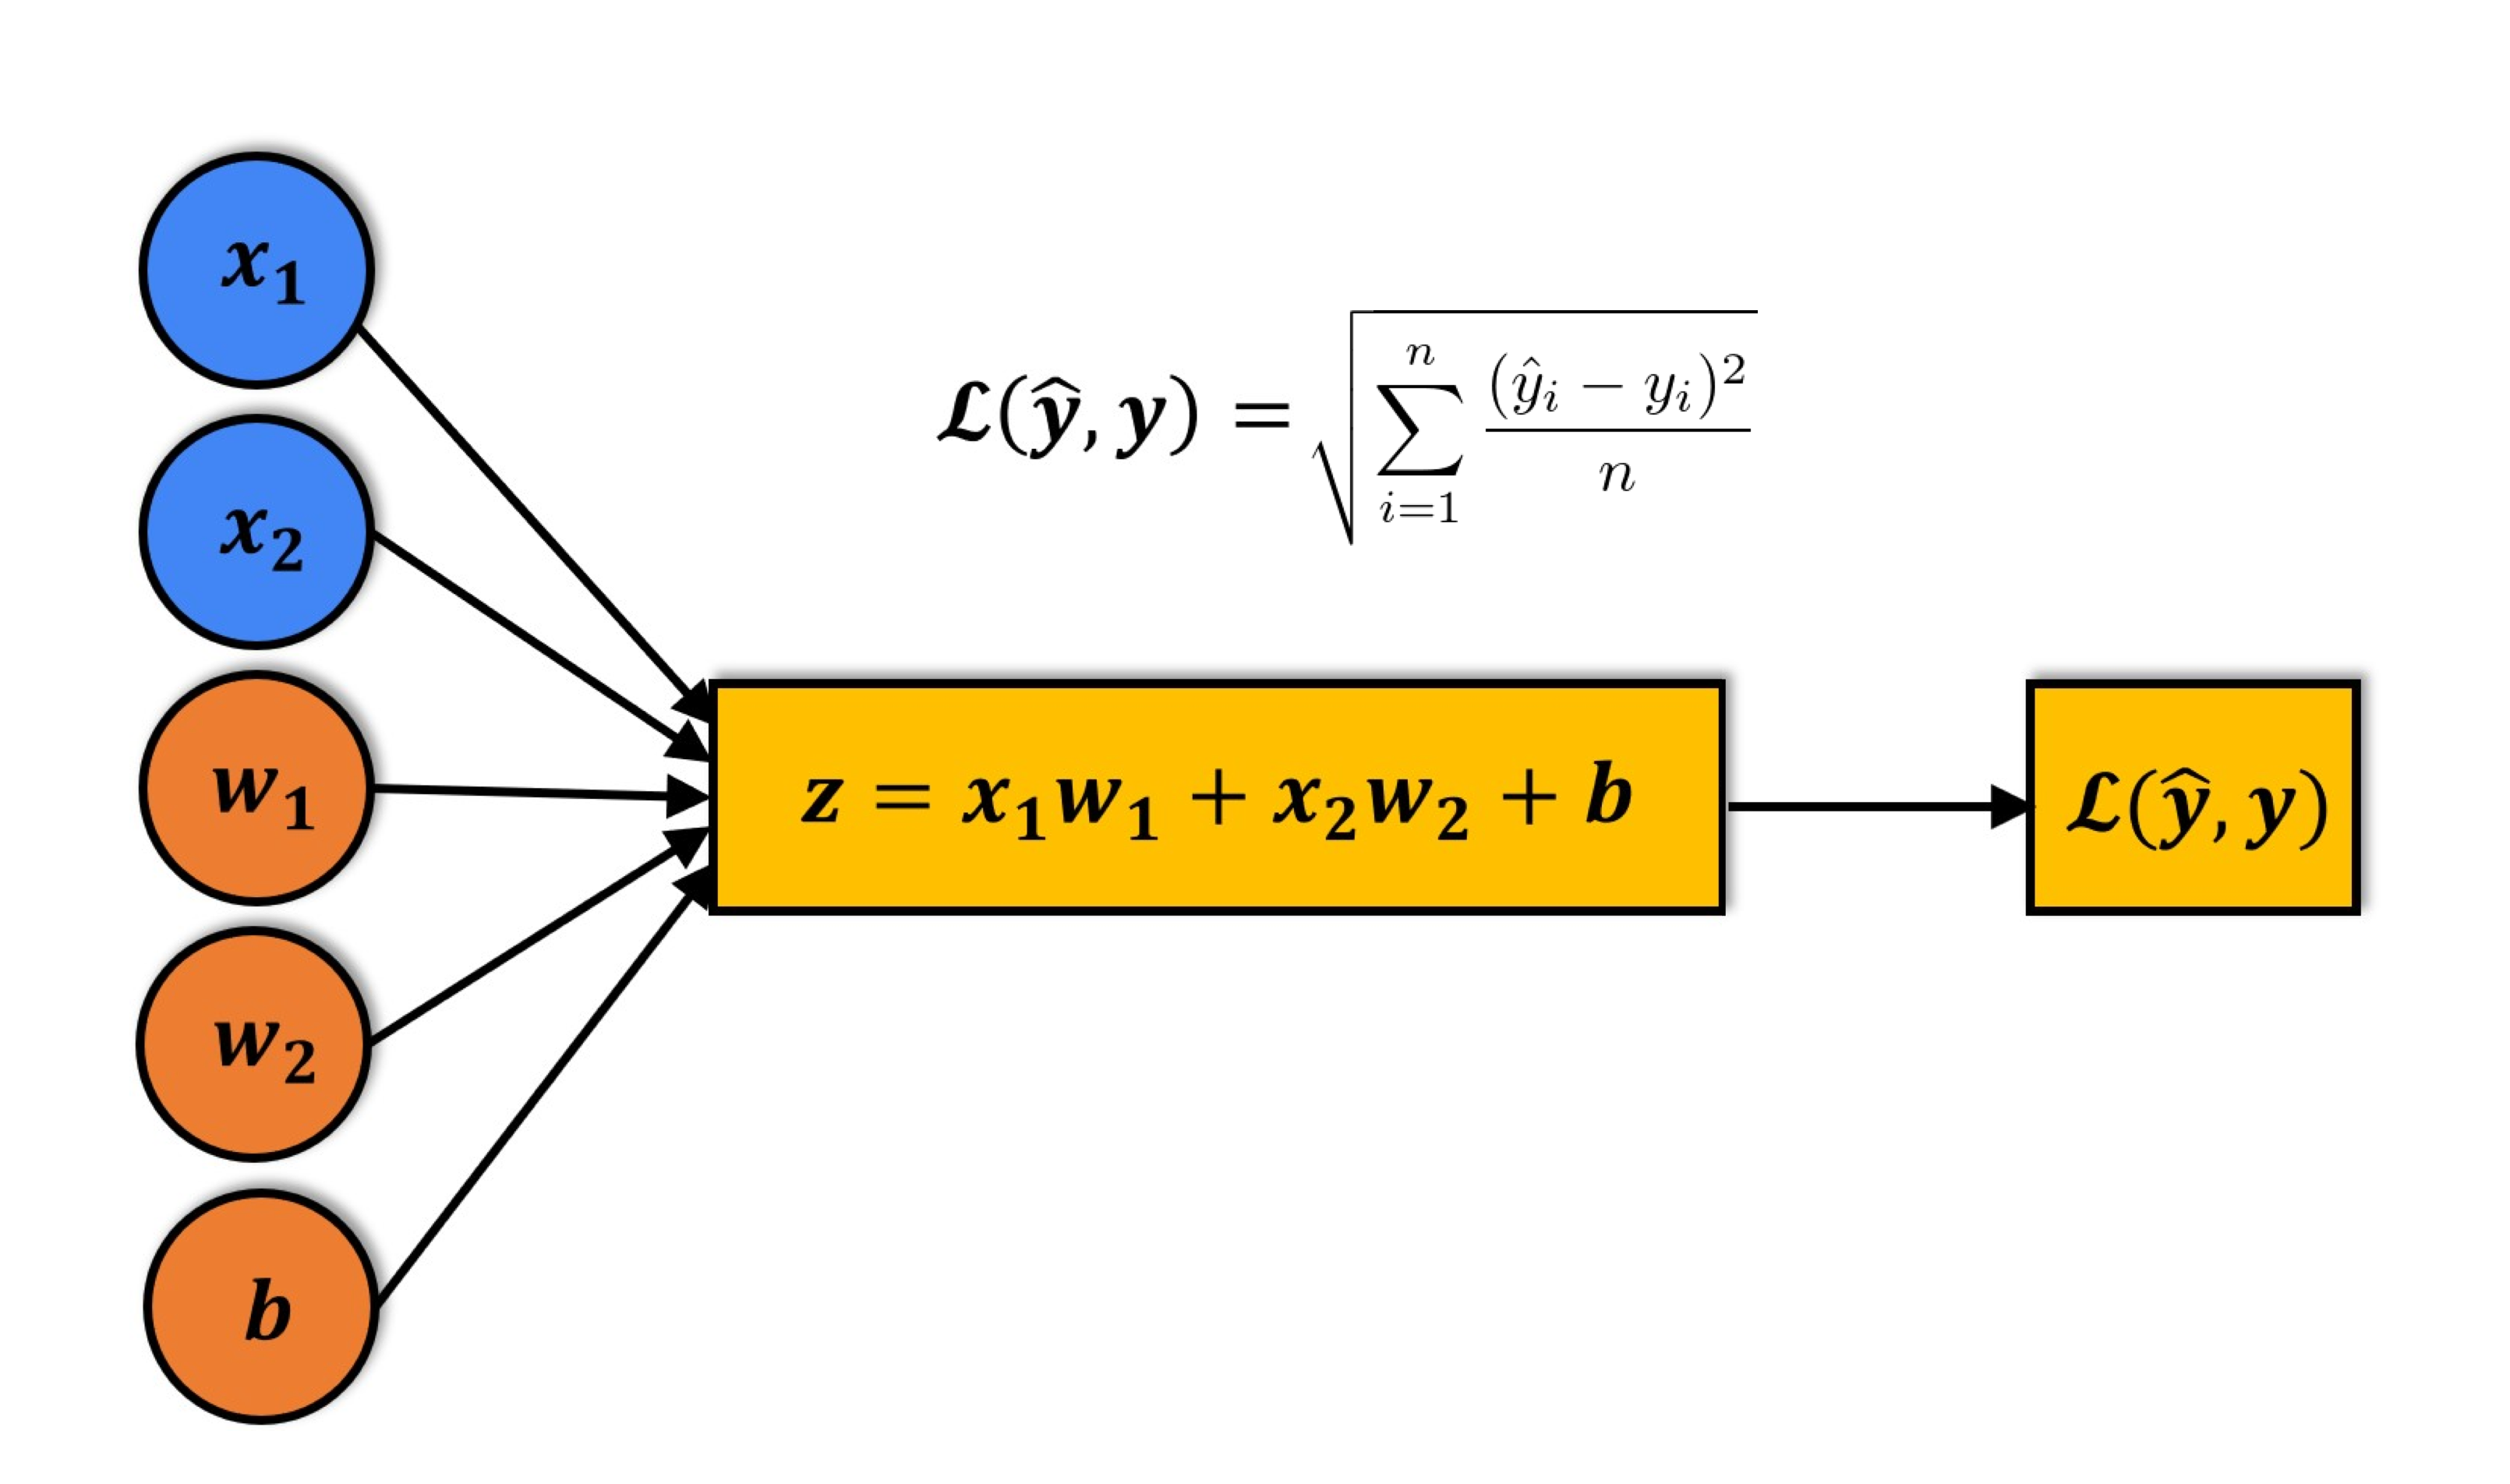

In [1]:
from IPython.display import Image
image_path = "LinRegression.png"
Image(filename=image_path)

## Downloading the Data

In [7]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [8]:
from urllib.request import urlretrieve

In [9]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x15b74d49e10>)

In [10]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [19]:
medical_df.shape

(1338, 7)

our objective is to find a way to estimate the value in the 'charges' column using values in the other columns

In [6]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### bmi = mass(in kg) / (square of height(m))

In [6]:
medical_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Analysis  and Visualization

explore the data by visuslizing the distribution of values in some columns of the dataset, and the relationship between charges and other columns

pip install plotly==5.18.0

pip install "jupyterlab>=3" "ipywidgets>=7.6"

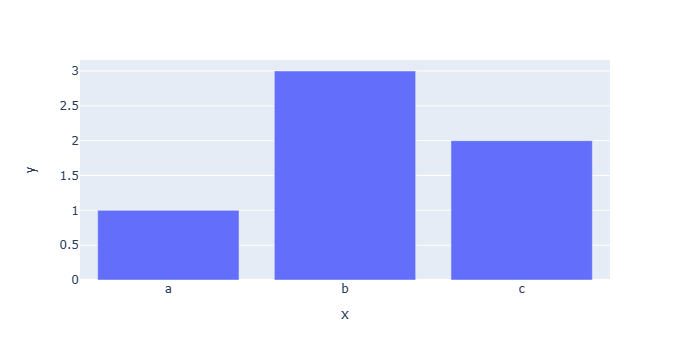

In [7]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [25]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

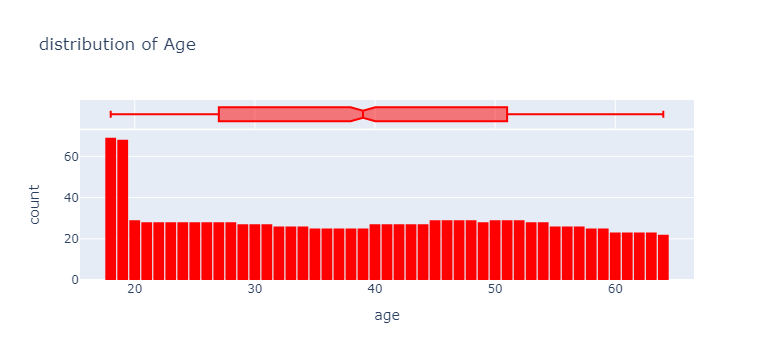

In [8]:
# max age 64, min age = 18, 64-18=47 one bin for each age

fig = px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  nbins=47,
                  title="distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()


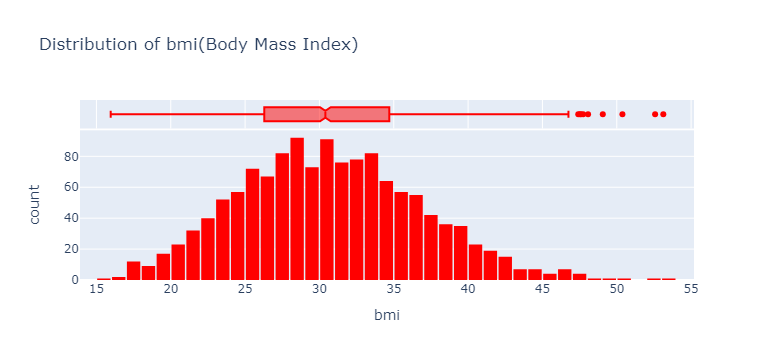

In [9]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of bmi(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

BMI seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

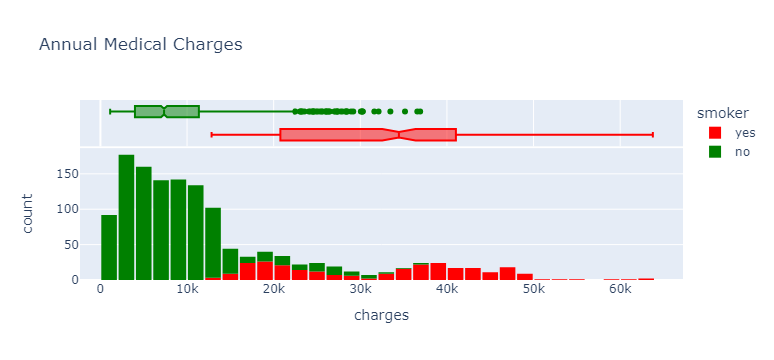

In [10]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Annual Medical Charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

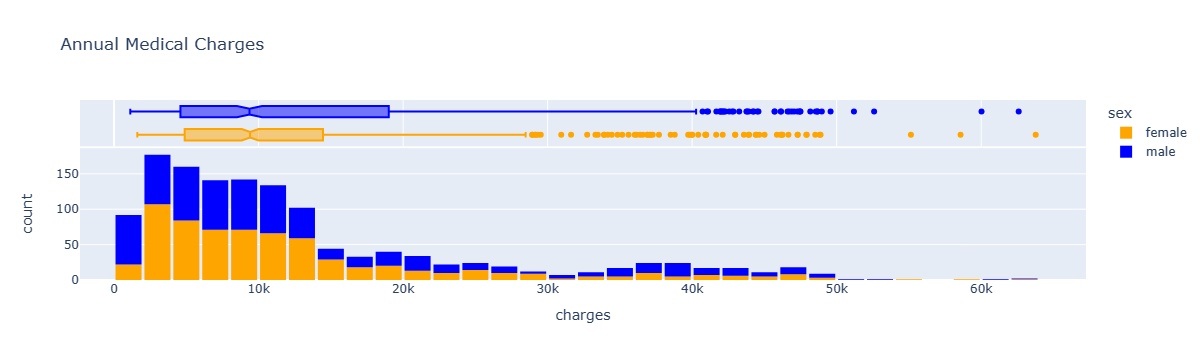

In [11]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['orange', 'blue'],
                   title='Annual Medical Charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()

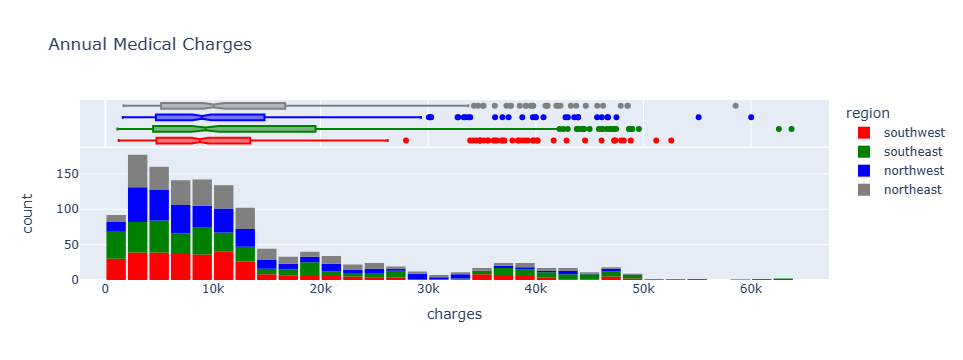

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'green', 'blue', 'grey'],
                   title='Annual Medical Charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()

In [40]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

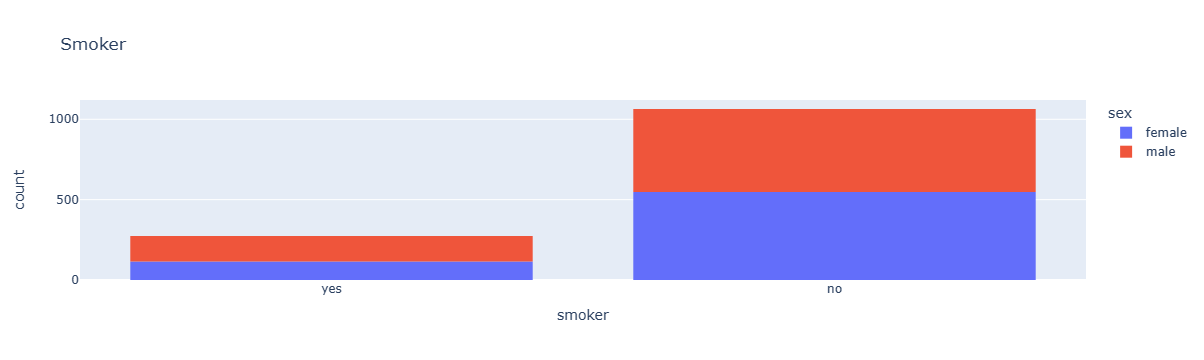

In [13]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker ')

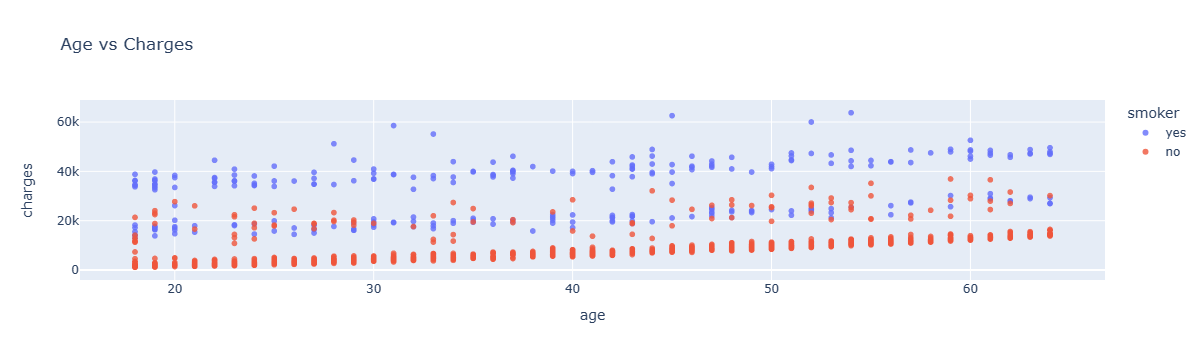

In [14]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges'
                )
fig.update_traces(marker_size=6)
fig.show()

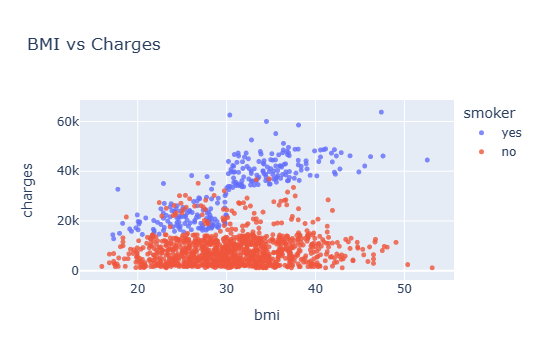

In [15]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges'
                )
fig.update_traces(marker_size=5)
fig.show()

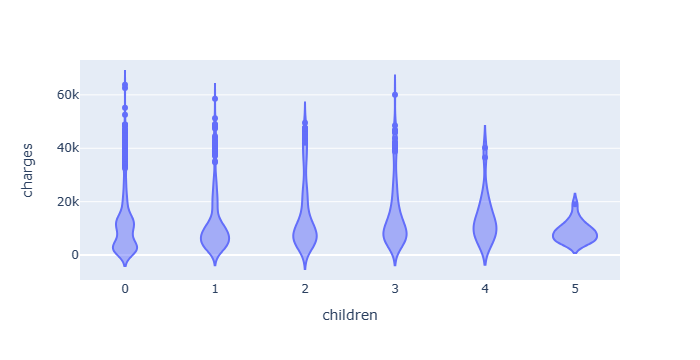

In [16]:
fig = px.violin(medical_df,
                 x='children',
                 y='charges',
                )
fig.show()

## Correlation

In [17]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [18]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [19]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [20]:
# corr function does not work with categorical column will gthrow error
medical_df.charges.corr(medical_df.smoker)  

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [22]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [23]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [24]:
medical_df.corr()

C:\Users\snikh\AppData\Local\Temp\ipykernel_9276\4290363667.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

C:\Users\snikh\AppData\Local\Temp\ipykernel_9276\1443531719.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



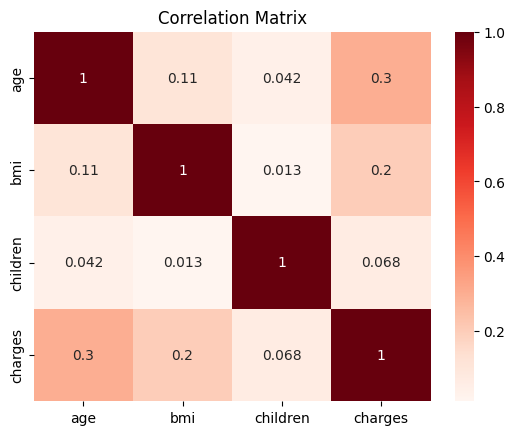

In [26]:
sns.heatmap(medical_df.corr(),cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

## Linear Regression using a single feature

#### divided the Dataset based on smoker column 


In [27]:
non_smoker_df = medical_df[medical_df['smoker']=='no']
non_smoker_df.shape

(1064, 7)

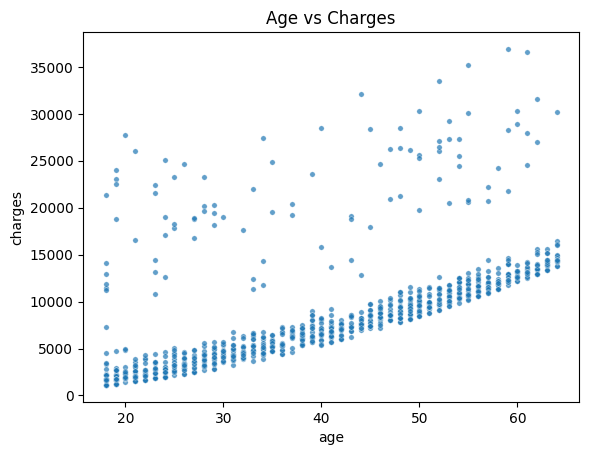

In [28]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges', alpha=0.7, s=15);

In [29]:
def estimate_charges(age, w, b):
    return (w*age + b)

Text(0.5, 0, 'Age')

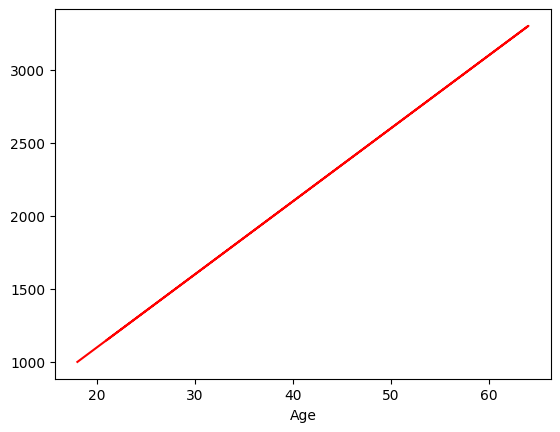

In [30]:
# lets guess the value for w and b
w,b = 50,100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')

In [31]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [32]:
estimated_charges  

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

not matching, way off from the actual values

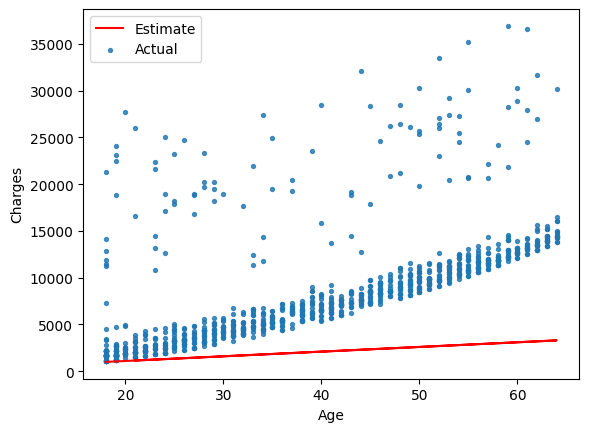

In [33]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r-')
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])


In [34]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target_charges = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges,'r', alpha=0.9)
    plt.scatter(ages, target_charges, s=8, alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

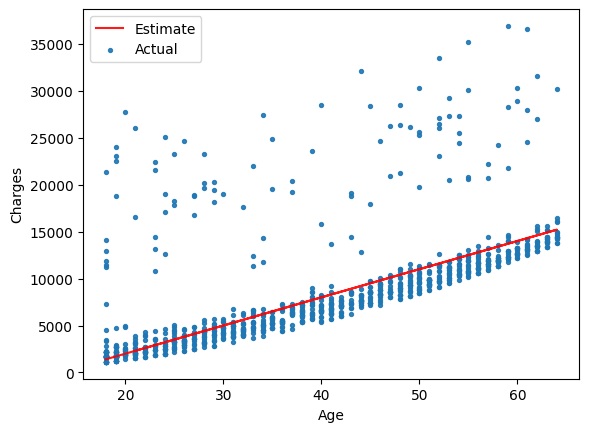

In [35]:
# by hit and trial method try to find a value for w and b , 
# by those we could find a best fit line

try_parameters(300,-4000)  

### RMSE

In [36]:
import numpy as np

In [37]:
targets=non_smoker_df.charges
predictions = estimated_charges

In [38]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))


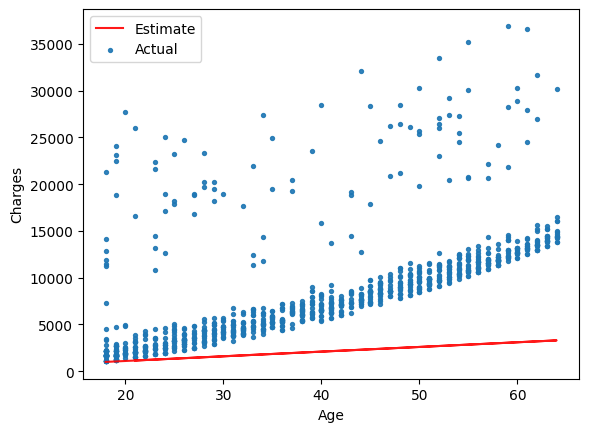

In [39]:
w,b = 50,100
try_parameters(w,b)

In [40]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w,b)

In [41]:
rmse(targets,predicted)  # bad model as rmse is high

8461.949562575493

In [42]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target_charges = non_smoker_df.charges
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges,'r', alpha=0.9)
    plt.scatter(ages, target_charges, s=8, alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(target_charges, estimated_charges)
    print("RMSE loss: ",loss)

RMSE loss:  4723.945172306606


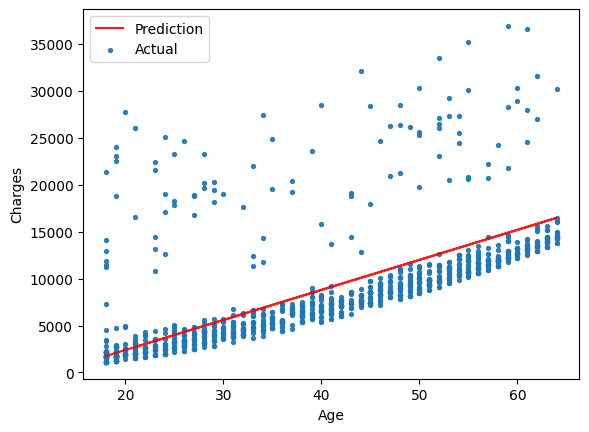

In [43]:
try_parameters(320,-4010)

## Optimizer
#### we need a strategy to modify weights w and bias b to reduce the loss and imrove the 'fit' of the line to the the data.
* Ordinary least squares  (better for smaller datasets)
* Stochastic gradient descent (better for large datasets)

## Linear Regression using scikit-learn

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
model = LinearRegression()

In [46]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [158]:
 # model.fit requires two columns, we dont want series we want dataframe
inputs = non_smoker_df[['age']] 

# target can be an array or series
targets = non_smoker_df.charges 

print('inputs.shape: ', inputs.shape)
print('target.shape: ', targets.shape)

inputs.shape:  (1064, 1)
target.shape:  (1064,)


In [159]:
inputs

age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]

In [160]:
type(inputs)

pandas.core.frame.DataFrame

In [161]:
type(targets)

pandas.core.series.Series

RMSE loss:  4662.505766636395


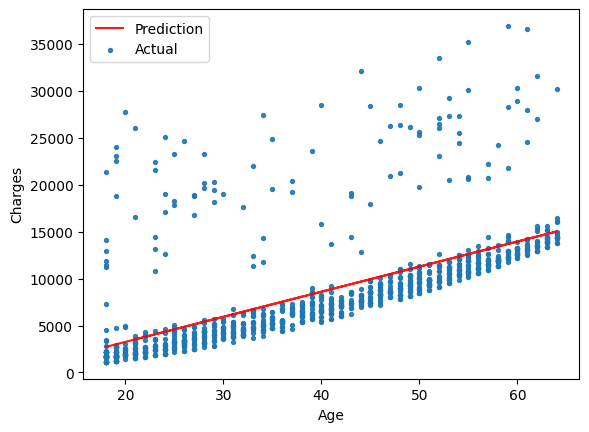

In [162]:
inputs = non_smoker_df[['age']]  
targets = non_smoker_df.charges
model = LinearRegression()
model.fit(inputs,targets)
predictions = model.predict(inputs)
try_parameters(model.coef_,model.intercept_)

In [163]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\snikh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [164]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [166]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [169]:
rmse(targets,predictions)

4662.505766636395

### seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

In [56]:
# w
model.coef_

array([267.24891283])

In [57]:
# b
model.intercept_

-2091.4205565650864

In [61]:
from sklearn.linear_model import SGDRegressor

In [66]:
model_SGD = SGDRegressor()
model_SGD.fit(inputs,targets)
predictions = model_SGD.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  5018.076195774331


In [171]:
model_SGD.predict(np.array([[23],[37],[61]]))

C:\Users\snikh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 1394.23118431,  6016.40322122, 13940.12671307])

In [68]:
predictions

array([-256.54454316, 3045.00691178, 4695.78263925, ..., -256.54454316,
       -256.54454316,  733.92089333])

In [69]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [70]:
model_SGD.coef_

array([330.15514549])

In [71]:
model_SGD.intercept_

array([-6199.33716204])

RMSE loss:  5018.076195774331


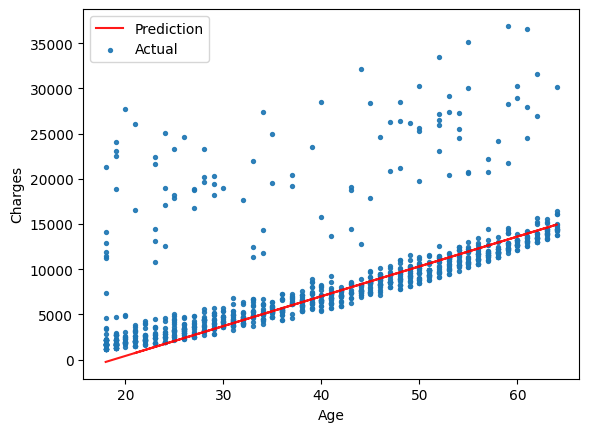

In [72]:
try_parameters(model_SGD.coef_, model_SGD.intercept_)

## Linear Regression model to estimate medical charges for non smokers.

RMSE loss:  4662.505766636395


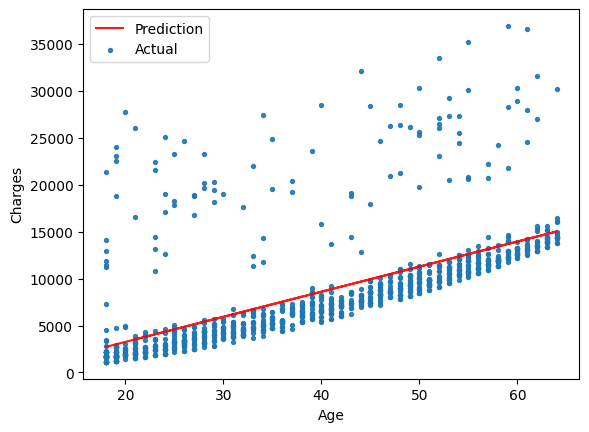

In [173]:
inputs = non_smoker_df[['age']] 
targets = non_smoker_df.charges
model = LinearRegression()
model.fit(inputs,targets)
predictions = model.predict(inputs)
try_parameters(model.coef_,model.intercept_)

<h4 style="color:red">Linear Regression using multilple features</h4> 


##### We need to change just one line of code to include another feature or column

In [73]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("LOss:", loss)

LOss: 4662.3128354612945


In [74]:
non_smoker_df.charges.corr(non_smoker_df.bmi)  

0.08403654312833271

### no as such improvement in loss by including bmi, as correlation is also very less with charges

In [75]:
model.coef_, model.intercept_  

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [151]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("LOss:", loss)

LOss: 4608.470405038246


In [152]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

#### children correlation with charges is slightly better than bmi

In [78]:
model.coef_, model.intercept_  

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.297603223591)

In [79]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

## Linear Regression model to estimate medical charges for smokers.

In [182]:
def try_parameters(w,b):
    ages = smoker_df.age
    target_charges = smoker_df.charges
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges,'r', alpha=0.9)
    plt.scatter(ages, target_charges, s=8, alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(target_charges, estimated_charges)
    print("RMSE loss: ",loss)

In [183]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
smoker_df.shape

(274, 13)

RMSE loss:  10711.00334810241


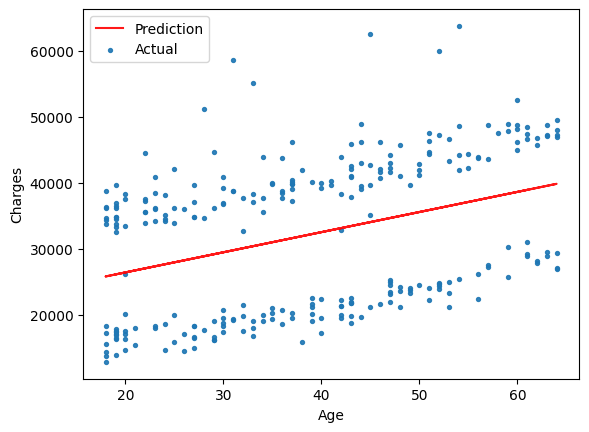

In [184]:
inputs = smoker_df[['age']]  # model.fit requires two columns, we dont want series we want dataframe
targets = smoker_df.charges
model = LinearRegression()
model.fit(inputs,targets)
predictions = model.predict(inputs)
try_parameters(model.coef_,model.intercept_)

<h4 style="color:red">Linear Regression using multilple features</h4> 

In [187]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(smoker_df.charges, predictions)
print("LOss:", loss)

LOss: 5718.202480524154


## Linear Regression model to estimate Charges for all the Customers.

In [188]:
def try_parameters(w,b):
    ages = medical_df.age
    target_charges = medical_df.charges
    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges,'r', alpha=0.9)
    plt.scatter(ages, target_charges, s=8, alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])

    loss = rmse(target_charges, estimated_charges)
    print("RMSE loss: ",loss)

RMSE loss:  11551.66562075632


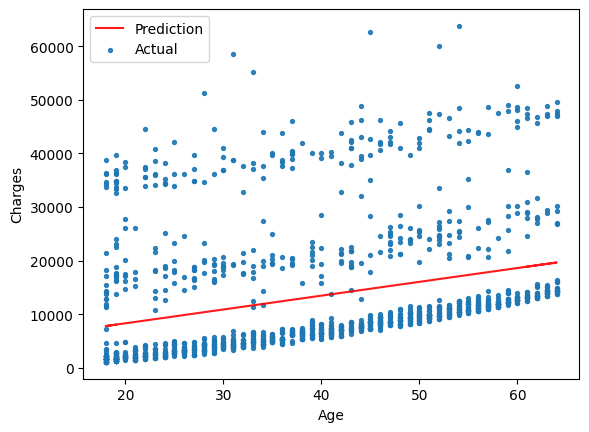

In [189]:
inputs = medical_df[['age']]  # model.fit requires two columns, we dont want series we want dataframe
targets = medical_df.charges
model = LinearRegression()
model.fit(inputs,targets)
predictions = model.predict(inputs)
try_parameters(model.coef_,model.intercept_)

<h4 style="color:red">Linear Regression using multilple features</h4> 

In [191]:
inputs, targets = medical_df[['age','bmi', 'children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(medical_df.charges, predictions)
print("LOss:", loss)

LOss: 11355.317901125973


### We successfully addressed the given problem statement through two distinct approaches. 
<h4 style="color:blue">In the first approach, we developed two separate models tailored to the characteristics of individuals classified as smokers and non-smokers. Each model was trained on distinct datasets corresponding to these criteria, allowing us to estimate medical charges more accurately within each subgroup.</h4>

<h4 style="color:blue">Alternatively, the second approach involved creating a unified model without specific criteria, encompassing the entire dataset. This model was designed to predict medical charges for all customers collectively, without differentiation based on smoking status. By employing both strategies, we explored the effectiveness of model development with and without segmentation based on this particular criterion.</h4>

## Using Categorical Features for Machine Learning

### To use the categorical columns, we simply need to convert them to numbers, there are 3 techniques for doing this:
* if a categorical column has just two categories(it's called BINARY CATEGORY), then we can replace their alues with 1 and 0)
* If a categorical column has more than 2 categories, we can performm one-hot encoding i.e. create anew column for each category with 1s and 0s.
* if the category have a natural order(e.g. cold, neutral, warm, hot), they they can be converted to numbers (1,2,3,4) preserving the order. These are called ordinals.

### Binary Category - converting into 0 and 1
#### smoker column

<AxesSubplot: xlabel='smoker', ylabel='charges'>

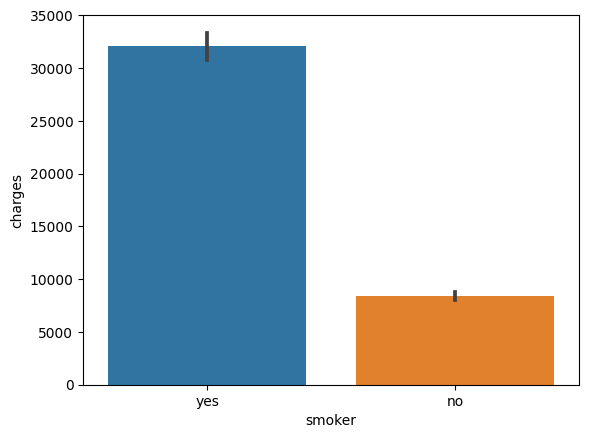

In [81]:
sns.barplot(data=medical_df, x='smoker', y ='charges')

In [82]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [83]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

#### smoker column which is the categorical feature that we have converted into numerical feature, and here as we can see smoker column have higher correlation with charges which is our target variable

In [84]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(medical_df.charges, predictions)
print("LOss:", loss)

LOss: 6056.439217188081


<AxesSubplot: xlabel='sex', ylabel='charges'>

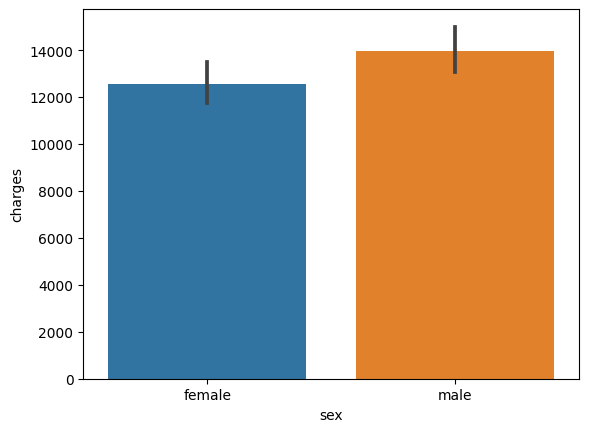

In [85]:
sns.barplot(data=medical_df, x='sex', y ='charges')

In [86]:
gender_codes = {'female':0, 'male':1}
medical_df['gender_code'] = medical_df.sex.map(gender_codes)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  gender_code  
0               1            0  
1               0            1  
2               0            1  
3               0            1  
4               0            1  
...           ...          ...  
1333            0            1  
1334            0            0  
1335            0            0  
1336            0            0  
1337            1            0  

[1338 rows x 9 columns]

In [87]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'gender_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(medical_df.charges, predictions)
print("LOss:", loss)

LOss: 6056.100708754546


In [88]:
medical_df.charges.corr(medical_df.gender_code)

0.05729206220202533

## One-hot Encoding
### For Region Column

<AxesSubplot: xlabel='region', ylabel='charges'>

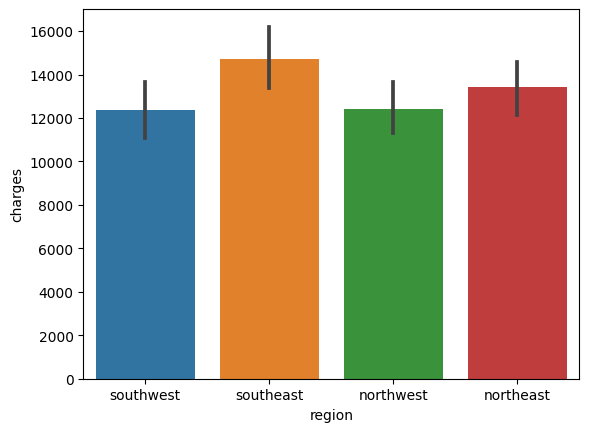

In [89]:
sns.barplot(data=medical_df, x='region', y ='charges')

In [90]:
from sklearn import preprocessing
oh_enc = preprocessing.OneHotEncoder()
oh_enc.fit(medical_df[['region']])
oh_enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [91]:
oh_enc.transform([['northeast'], ['northwest']]).toarray()

C:\Users\snikh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [92]:
one_hot= oh_enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [93]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  gender_code  northeast  northwest  southeast  southwest  
0               1            0        0.0        0.0        0.0        1.0  
1               0            1        0.0        0.0        1.0        0.0  
2               0            1        0.0        0.0        1.0        0.0  
3               0            1        0.0        1.0        0.0        0.0  
4               0            1        0.0        1.0        0.0        0.0  
...           ...          ...        ...        ...        ...        ...  
1333            0            1        0.0        1.0        0.0        0.0  
1334            0            0        1.0        0.0        0.0        0.0  
1335            0            0        0.0        0.0        1.0        0.0  
1336            0            0        0.0        0.0        0.0        1.0  
1337            1            0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [94]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'gender_code','northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(medical_df.charges, predictions)
print("LOss:", loss)

LOss: 6041.6796511744515


In [95]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [96]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'gender_code','northeast', 'northwest', 'southeast', 'southwest']

In [97]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4  gender_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

#### as we have seen age column has more correlation with target variable than bmi and children and regions but here weight coeficient of age is less than those columns why is that exactly??

* so the values of age column has more variations whereas bmi lies between certain  limited range which is (15 to 40) as well as regions lies between specific values which is 0 and 1
* ranges of different features are different and because of that their weights are not coming correctly
* as one column has very large range of inputs whereas one column has small range of inputs
#### so in this case we apply standardization, so that all the values  for every numerical columns comes under same range of input and then weights will make a lot of sense

# Model Improvements

## Standard Scaling
#### standardization - values become centered around 0. 
#### standardizing values of all the numerical columns so that distribution becomes normal distribution with standard deviation 1 and mean  0 , scaling down all their values  to smaller values like between -1 and 1 or -2 and 2

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
medical_df.dtypes

age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
smoker_code      int64
gender_code      int64
northeast      float64
northwest      float64
southeast      float64
southwest      float64
dtype: object

In [100]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [101]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [102]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [103]:
medical_df[numeric_cols]

age     bmi  children
0      19  27.900         0
1      18  33.770         1
2      28  33.000         3
3      33  22.705         0
4      32  28.880         0
...   ...     ...       ...
1333   50  30.970         3
1334   18  31.920         0
1335   18  36.850         0
1336   21  25.800         0
1337   61  29.070         0

[1338 rows x 3 columns]

In [115]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [117]:
cat_cols = ['smoker_code', 'gender_code', 'northeast', 'northwest', 'southeast',
       'southwest']
categorical_data = medical_df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [118]:
inputs = np.concatenate((scaled_inputs,categorical_data), axis=1)
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [119]:
inputs = np.concatenate((scaled_inputs,categorical_data), axis=1)
targets = medical_df.charges
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6041.679651174452


In [120]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

### We can now compare the weights in the formula:
##### charges = w1 x age + w2 x bmi + w3 x children + w4 x smoker + w5 x sex + w6 x region + b

In [124]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

weights_df

feature        weight
0          age   3607.472736
1          bmi   2067.691966
2     children    572.998210
3  smoker_code  23848.534542
4  gender_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1   8466.483215

### As we can see now, the most important features are: 
* Smoker
* Age
* BMI
  

## Creating a Test set

In [125]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)

In [142]:
model = LinearRegression().fit(X_train,y_train)
predictions_test = model.predict(X_test)
loss = rmse(y_test,predictions_test)
print("Test Loss: ", loss)

Test Loss:  6183.031496006047


#### Let's compare this with the training loss

In [143]:
predictions_train = model.predict(X_train)
loss = rmse(y_train,predictions_train)
print("Training Loss: ", loss)

Training Loss:  6027.6657664941995


# Summary
* A typical problem statement for Machine learning
* Downloading and exploring a Dataset for Machine Learning
* Linear Regression with one Variable using Scikit-Learn
* Linear Regression with multiple variables
* Using Categorical features for machine Learniing
* Regression coefficients and Feature importance
* Creating a training and test set for reporting results